In [132]:
#Importing the required functionalities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
#Reading the data from csv. Importing it into a data-frame
df = pd.read_csv('./Uber Request Data.csv')

In [134]:
#Printing the data-frame
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [135]:
#Printing the shape of data-frame(rows, columns)
df.shape

(6745, 6)

In [136]:
#Printing the column names
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [137]:
#Changing the column names into a uniform format
df.columns = ['Request_ID','Pickup_Point','Driver_ID','Status','Request_Timestamp','Drop_Timestamp']

In [138]:
#Displaying the first 5 rows to check changes
df.head(5)

,Request_ID,Pickup_Point,Driver_ID,Status,Request_Timestamp,Drop_Timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [139]:
#Checking the data-type each column has
df.dtypes

Request_ID             int64
Pickup_Point          object
Driver_ID            float64
Status                object
Request_Timestamp     object
Drop_Timestamp        object
dtype: object

In [140]:
#Converting the timestamp columns into a datetime object
df["Request_Timestamp"] = pd.to_datetime(df["Request_Timestamp"], errors = 'coerce')
df["Drop_Timestamp"] = pd.to_datetime(df["Request_Timestamp"], errors = 'coerce')

In [141]:
#Checking the changes
df.dtypes

Request_ID                    int64
Pickup_Point                 object
Driver_ID                   float64
Status                       object
Request_Timestamp    datetime64[ns]
Drop_Timestamp       datetime64[ns]
dtype: object

In [142]:
#Checking the changes in the data for respective columns
df.head(5)

,Request_ID,Pickup_Point,Driver_ID,Status,Request_Timestamp,Drop_Timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 11:51:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 17:57:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:17:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 08:33:16


In [143]:
#Extracting hours from the time-stamps for plotting
df['Request_Hour'] = df['Request_Timestamp'].dt.hour
df['Drop_Hour'] = df['Drop_Timestamp'].dt.hour
df

,Request_ID,Pickup_Point,Driver_ID,Status,Request_Timestamp,Drop_Timestamp,Request_Hour,Drop_Hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 11:51:00,11,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 17:57:00,17,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:17:00,9,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 21:08:00,21,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 08:33:16,8,8
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,2016-07-15 23:49:03,23,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,2016-07-15 23:50:05,23,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,2016-07-15 23:52:06,23,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,2016-07-15 23:54:39,23,23


In [150]:
#Deleting the time-stamp columns
df.drop(['Request_Timestamp','Drop_Timestamp'], axis = 1, inplace = True)
df

,Request_ID,Pickup_Point,Driver_ID,Status,Request_Hour,Drop_Hour
0,619,Airport,1.0,Trip Completed,11,11
1,867,Airport,1.0,Trip Completed,17,17
2,1807,City,1.0,Trip Completed,9,9
3,2532,Airport,1.0,Trip Completed,21,21
4,3112,City,1.0,Trip Completed,8,8
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,23,23
6741,6752,Airport,NaN,No Cars Available,23,23
6742,6751,City,NaN,No Cars Available,23,23
6743,6754,City,NaN,No Cars Available,23,23


In [151]:
#Filtering out all cancelled trips from the data
cancelled_trips = df[df['Status'] == 'Cancelled']

In [152]:
#Shape of cancelled trips
cancelled_trips.shape

(1264, 6)

In [153]:
#Filtering out the trips where no car was available
no_cars_available = df[df['Status'] == 'No Cars Available']

In [154]:
#No. of trips with no cars available
no_cars_available.shape

(2650, 6)

In [155]:
#Filtering out completed trips from the data
completed_trips = df[df['Status'] == 'Trip Completed']

In [158]:
#Shape of completed trips
completed_trips.shape

(2831, 6)

In [159]:
#get all unique status values
df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

([<matplotlib.patches.Wedge at 0x1394141cb80>,
 [Text(0.27450168572516814, 1.065198960069921, 'Trip Completed'),
  Text(-0.8197978372292603, -0.7334381405914391, 'No Cars Available'),
  Text(0.9148122117335418, -0.6108343615606329, 'Cancelled')],
 [Text(0.14972819221372807, 0.5810176145835932, '41.97%'),
  Text(-0.4471624566705055, -0.40005716759533033, '39.29%'),
  Text(0.4989884791273863, -0.3331823790330724, '18.74%')])

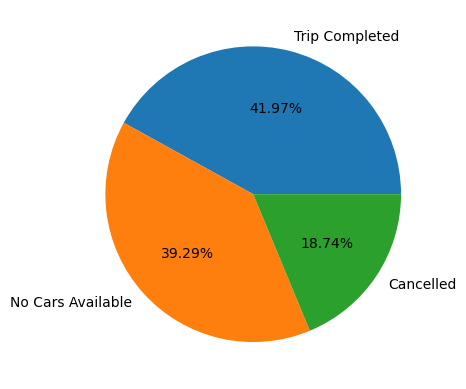

In [162]:
#Plotting pie-chart to show number of trips of each value
y = np.array([2831,2650,1264])
status_labels = ['Trip Completed','No Cars Available','Cancelled']
plt.pie(y, labels = status_labels, autopct = '%2.2f%%')

([<matplotlib.patches.Wedge at 0x13941475ac0>,
 [Text(0.6587063113848798, 0.8809687822742223, 'Supply'),
  Text(-0.6587063113848801, -0.8809687822742219, 'Demand')],
 [Text(0.3592943516644798, 0.48052842669503026, '29.56%'),
  Text(-0.35929435166448004, -0.4805284266950301, '70.44%')])

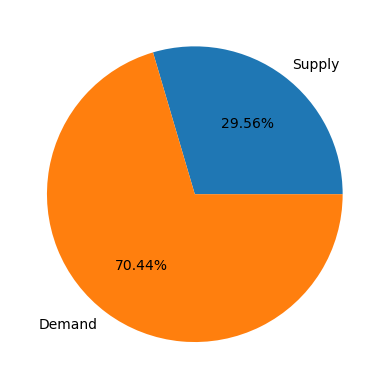

In [166]:
#Displaying Supply-Demand Gap using a pie-chart
x = ['Supply', 'Demand']
supply_demand = np.array([2831,6745])
plt.pie(supply_demand, labels = x, autopct = "%2.2f%%")


In [167]:
# Converting the hours column to list format


,Request_ID,Pickup_Point,Driver_ID,Status,Request_Hour,Drop_Hour
2831,2905,City,1.0,Cancelled,6,6
2832,4805,City,1.0,Cancelled,17,17
2833,5202,Airport,1.0,Cancelled,20,20
2834,5927,City,1.0,Cancelled,10,10
2835,2347,Airport,2.0,Cancelled,19,19
...,...,...,...,...,...,...
4090,1641,City,299.0,Cancelled,7,7
4091,4158,City,299.0,Cancelled,5,5
4092,4164,City,299.0,Cancelled,5,5
4093,4448,City,299.0,Cancelled,8,8


In [169]:
#Histogram to show the timeslots when trips got cancelled
cancelled_hour = cancelled_trips['Request_Hour'].tolist()
not_available_hour = no_cars_available['Request_Hour'].tolist()

range = (0, 23)
bins = 24 #intervals/buckets

#function to draw histogram chart
def plots(q):
    plt.hist(q, bins, range, color = 'orange', histtype = 'bar', rwidth = 0.8)
    plt.xlabel('Time Slots')
    plt.ylabel('No. of trips')

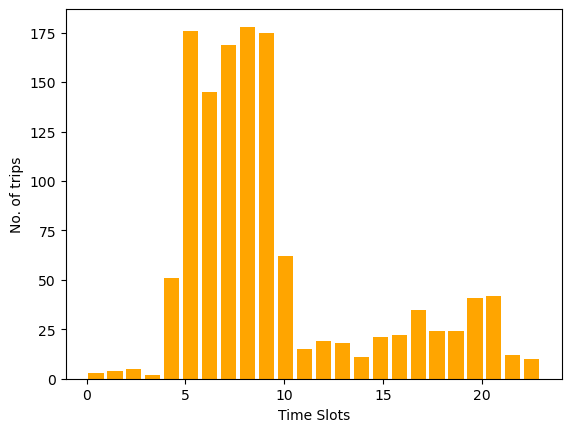

In [170]:
plots(cancelled_hour)


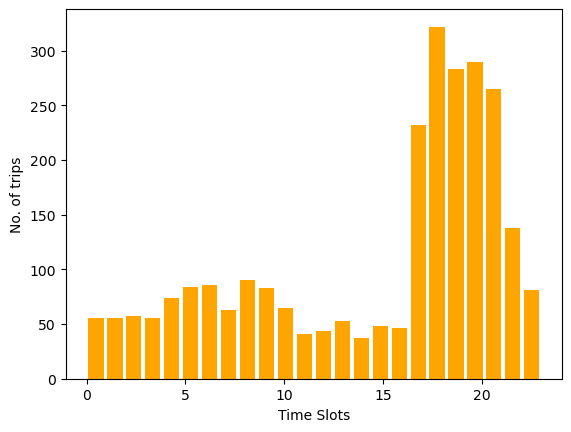

In [171]:
plots(not_available_hour)

In [178]:
#Filtering unsuccessful trips from city to airport
city_to_airport = df[(df.Status != 'Trip Completed') & (df.Pickup_Point == 'City')]
city_to_airport.shape

(2003, 6)

In [179]:
#Filtering unsuccessful trips from airport to city
airport_to_city = df[(df.Status != 'Trip Completed') & (df.Pickup_Point == 'Airport')]
airport_to_city.shape

(1911, 6)

([<matplotlib.patches.Wedge at 0x139415c8be0>,
 [Text(0.04060517048133803, 1.0992502991267192, 'Failed Trips from Airport to City'),
  Text(-0.04060527340057912, -1.0992502953249839, 'Failed Trips from City to Airport')],
 [Text(0.022148274808002556, 0.5995910722509377, '48.82%'),
  Text(-0.022148330945770428, -0.5995910701772639, '51.18%')])

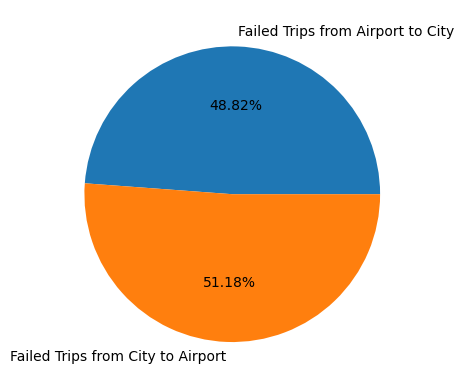

In [180]:
#Bar Graph to show the gap between unsuccessful trips from city to airport and from airport to city
p = ["Failed Trips from Airport to City", "Failed Trips from City to Airport"]
q = np.array([1911, 2003])
plt.pie(q, labels = p, autopct = '%2.2f%%')


In [185]:
#Filtering cancelled trips from city to airport
city_to_airport_cancelled= df[(df.Status == "Cancelled") & (df.Pickup_Point == "City")]
city_to_airport_cancelled.shape


(1066, 6)

In [188]:
#Filtering cancelled trips from airport to city
airport_to_city_cancelled= df[(df.Status == "Cancelled") & (df.Pickup_Point == "Airport")]
airport_to_city_cancelled.shape



(198, 6)

In [189]:
#Filtering cancelled trips from city to airport when cars were not available
city_to_airport_not_available = df[(df.Status == 'No Cars Available') & (df.Pickup_Point == 'City')]
city_to_airport_not_available.shape

(937, 6)

In [190]:
#Filtering cancelled trips from airport to city when cars were not available
airport_to_city_not_available = df[(df.Status == 'No Cars Available') & (df.Pickup_Point == 'Airport')]
airport_to_city_not_available.shape

(1713, 6)

In [191]:
#Number of hours to list format
city_to_airport_cancelled_hour = city_to_airport_cancelled['Request_Hour'].tolist()

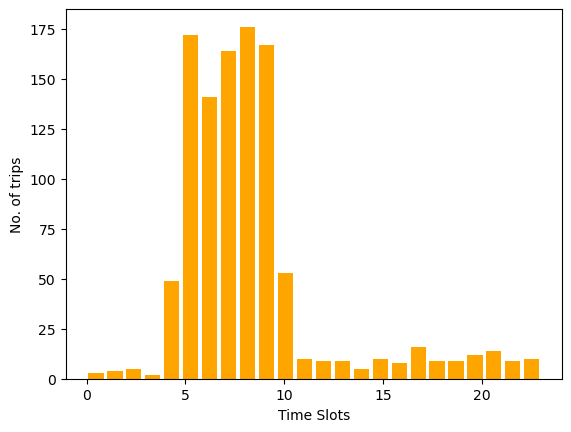

In [193]:
#Plotting a histogram to show the time slots when trip from city to airport got cancelled
plots(city_to_airport_cancelled_hour)

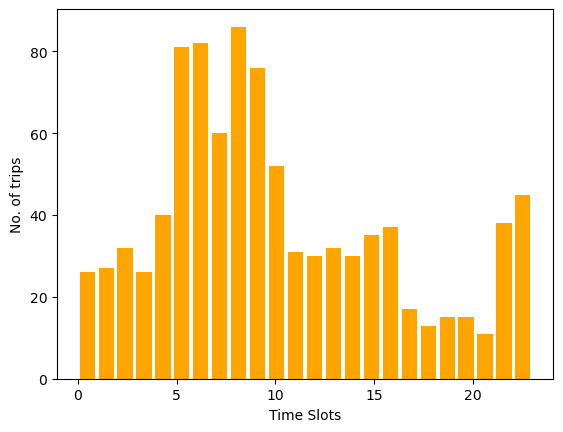

In [195]:
#Plotting a histogram to show the time slots when cars were not available for city to airport trip
city_to_airport_not_available_hour = city_to_airport_not_available['Request_Hour'].tolist()
plots(city_to_airport_not_available_hour)

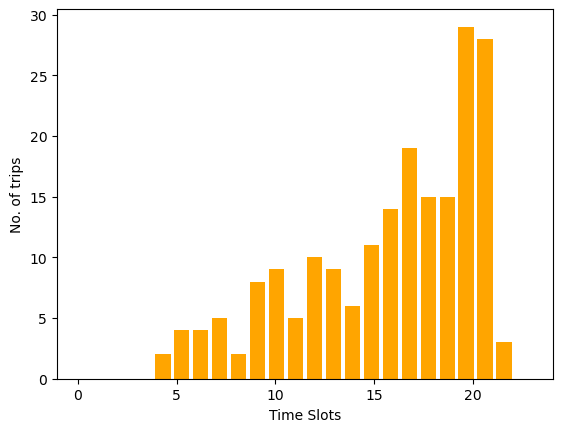

In [196]:
#Plotting a histogram to show the time slots when trips from airport to city got cancelled
airport_to_city_cancelled_hour = airport_to_city_cancelled['Request_Hour'].tolist()
plots(airport_to_city_cancelled_hour)

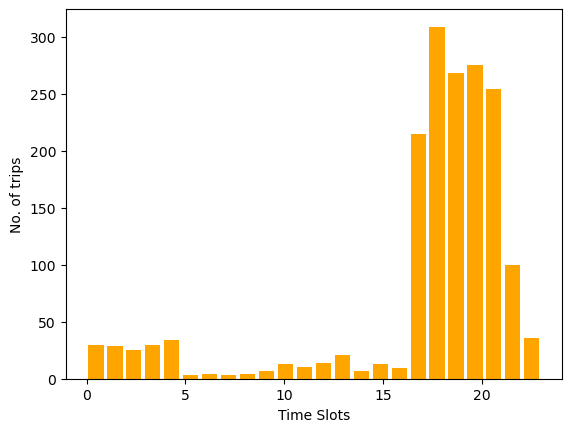

In [197]:
#Plotting a histogram to show the time slots when cars were not availabale for airport to city trip
airport_to_city_not_available_hour = airport_to_city_not_available['Request_Hour'].tolist()
plots(airport_to_city_not_available_hour)